# Корреляционный анализ: Зависимость численности населения от экономических и экологических факторов

## Модель 4
- **y** - численность населения (млн человек)
- **x1** - ВВП (млрд долларов США)
- **x2** - уровень выброса CO₂ (тонн на душу населения)
- **x3** - энергопотребление (кВт·ч на душу населения)
- **x4** - расходы на здравоохранение (% от ВВП)
- **x5** - уровень урбанизации (%)

## Цель исследования
Провести корреляционный анализ данных для определения степени зависимости численности населения от выбранных факторов и взаимосвязи между самими факторами.


In [1]:
# Импорт необходимых библиотек для корреляционного анализа

# pandas - для работы с табличными данными (DataFrame)
import pandas as pd

# numpy - для математических операций с массивами
import numpy as np

# matplotlib - базовая библиотека для создания графиков
import matplotlib.pyplot as plt

# seaborn - расширенная библиотека для статистической визуализации
import seaborn as sns

# scipy.stats - статистические функции, включая коэффициент корреляции Пирсона
from scipy.stats import pearsonr

# отключение предупреждений для чистоты вывода
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля и размеров графиков для лучшего отображения
plt.style.use('default')  # использование стандартного стиля matplotlib
sns.set_palette("husl")   # установка цветовой палитры для seaborn
plt.rcParams['figure.figsize'] = (12, 8)  # размер фигур по умолчанию
plt.rcParams['font.size'] = 12             # размер шрифта

print("Библиотеки успешно импортированы!")


Библиотеки успешно импортированы!


In [2]:
# Загрузка данных
df = pd.read_csv('data.csv')

print("Размер выборки:", df.shape)
print("\nПервые 5 строк данных:")
print(df.head())

print("\nИнформация о данных:")
print(df.info())

print("\nПроверка на пропущенные значения:")
print(df.isnull().sum())


Размер выборки: (57, 7)

Первые 5 строк данных:
     Country  Population_millions  GDP_billion_USD  \
0    Belarus                  9.5             63.1   
1     Russia                144.1           1829.0   
2    Ukraine                 41.2            200.1   
3     Poland                 37.8            679.4   
4  Lithuania                  2.8             56.5   

   CO2_emissions_tons_per_capita  Energy_consumption_kWh_per_capita  \
0                            6.4                               3250   
1                           11.9                               6500   
2                            4.7                               2850   
3                            8.1                               4100   
4                            4.5                               3850   

   Healthcare_expenditure_percent_GDP  Urbanization_percent  
0                                 6.1                  79.5  
1                                 5.3                  74.8  
2             

In [3]:
# Переименование столбцов для удобства анализа
df_analysis = df.rename(columns={
    'Population_millions': 'y_Population',
    'GDP_billion_USD': 'x1_GDP',
    'CO2_emissions_tons_per_capita': 'x2_CO2',
    'Energy_consumption_kWh_per_capita': 'x3_Energy',
    'Healthcare_expenditure_percent_GDP': 'x4_Healthcare',
    'Urbanization_percent': 'x5_Urbanization'
})

# Выбор только числовых столбцов для анализа
numerical_cols = ['y_Population', 'x1_GDP', 'x2_CO2', 'x3_Energy', 'x4_Healthcare', 'x5_Urbanization']
df_numerical = df_analysis[numerical_cols].copy()

print("Описательная статистика:")
print(df_numerical.describe())


Описательная статистика:
       y_Population        x1_GDP     x2_CO2     x3_Energy  x4_Healthcare  \
count     57.000000     57.000000  57.000000     57.000000      57.000000   
mean      93.889474   1521.742105   5.908772   6398.245614       7.770175   
std      261.555343   3847.147093   3.316586   7609.474621       2.730448   
min        0.400000     24.200000   1.200000    750.000000       1.200000   
25%        6.900000    181.800000   3.800000   2850.000000       6.100000   
50%       19.100000    396.000000   5.000000   4650.000000       7.800000   
75%       67.400000   1293.000000   7.700000   7300.000000       9.700000   
max     1439.300000  23315.100000  15.600000  54000.000000      17.100000   

       x5_Urbanization  
count        57.000000  
mean         74.250877  
std          14.750449  
min          35.000000  
25%          64.200000  
50%          76.600000  
75%          85.500000  
max         100.000000  


## 1. Корреляционный анализ полных данных

### 1.1 Построение корреляционной матрицы


Корреляционная матрица:
                 y_Population  x1_GDP  x2_CO2  x3_Energy  x4_Healthcare  \
y_Population            1.000   0.582  -0.041     -0.122         -0.195   
x1_GDP                  0.582   1.000   0.368      0.055          0.364   
x2_CO2                 -0.041   0.368   1.000      0.294          0.351   
x3_Energy              -0.122   0.055   0.294      1.000          0.298   
x4_Healthcare          -0.195   0.364   0.351      0.298          1.000   
x5_Urbanization        -0.339   0.019   0.312      0.369          0.425   

                 x5_Urbanization  
y_Population              -0.339  
x1_GDP                     0.019  
x2_CO2                     0.312  
x3_Energy                  0.369  
x4_Healthcare              0.425  
x5_Urbanization            1.000  


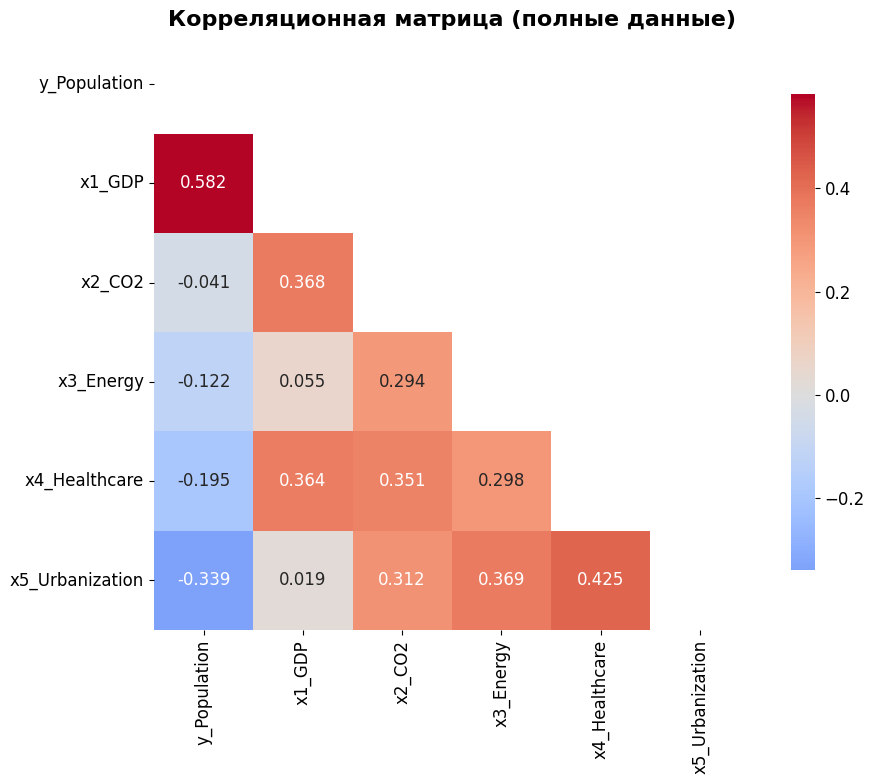

In [4]:
# Вычисление корреляционной матрицы
correlation_matrix = df_numerical.corr()

print("Корреляционная матрица:")
print(correlation_matrix.round(3))

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            mask=mask,
            cbar_kws={"shrink": .8},
            fmt='.3f')
plt.title('Корреляционная матрица (полные данные)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [5]:
# Анализ корреляций с зависимой переменной y_Population
y_correlations = correlation_matrix['y_Population'].drop('y_Population')

print("Корреляции с численностью населения (y):")
print("="*50)
for var, corr in y_correlations.items():
    print(f"{var:<20}: {corr:>7.3f}")
    
print("\nИнтерпретация корреляций с численностью населения:")
print("="*60)
for var, corr in y_correlations.items():
    if abs(corr) >= 0.7:
        strength = "сильная"
    elif abs(corr) >= 0.4:
        strength = "умеренная"
    elif abs(corr) >= 0.2:
        strength = "слабая"
    else:
        strength = "очень слабая"
    
    direction = "положительная" if corr > 0 else "отрицательная"
    print(f"{var}: {strength} {direction} связь ({corr:.3f})")


Корреляции с численностью населения (y):
x1_GDP              :   0.582
x2_CO2              :  -0.041
x3_Energy           :  -0.122
x4_Healthcare       :  -0.195
x5_Urbanization     :  -0.339

Интерпретация корреляций с численностью населения:
x1_GDP: умеренная положительная связь (0.582)
x2_CO2: очень слабая отрицательная связь (-0.041)
x3_Energy: очень слабая отрицательная связь (-0.122)
x4_Healthcare: очень слабая отрицательная связь (-0.195)
x5_Urbanization: слабая отрицательная связь (-0.339)


Корреляции между экзогенными переменными (факторами x):


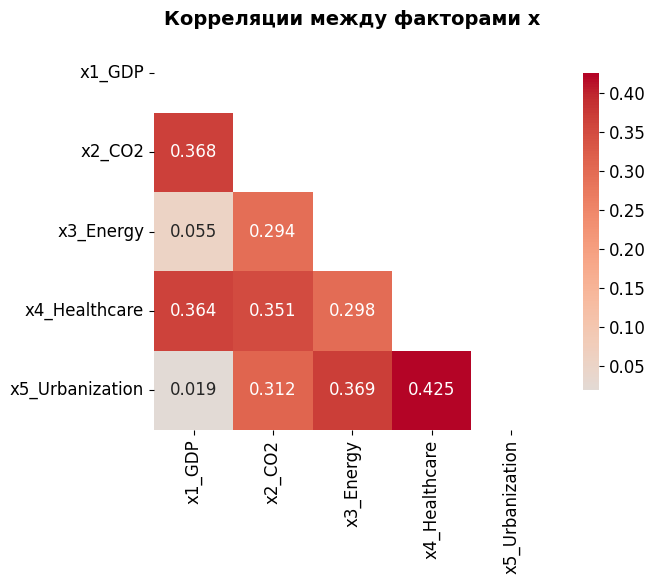


Значимые корреляции между факторами (|r| >= 0.3):
--------------------------------------------------
x1_GDP - x2_CO2: 0.368
x1_GDP - x4_Healthcare: 0.364
x2_CO2 - x4_Healthcare: 0.351
x2_CO2 - x5_Urbanization: 0.312
x3_Energy - x5_Urbanization: 0.369
x4_Healthcare - x5_Urbanization: 0.425


In [6]:
# Анализ корреляций между факторами x
print("Корреляции между экзогенными переменными (факторами x):")
print("="*65)

x_vars = ['x1_GDP', 'x2_CO2', 'x3_Energy', 'x4_Healthcare', 'x5_Urbanization']
x_correlations = correlation_matrix.loc[x_vars, x_vars]

# Создание матрицы только для факторов x
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(x_correlations, dtype=bool))
sns.heatmap(x_correlations, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            mask=mask,
            cbar_kws={"shrink": .8},
            fmt='.3f')
plt.title('Корреляции между факторами x', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Вывод значимых корреляций между факторами
print("\nЗначимые корреляции между факторами (|r| >= 0.3):")
print("-"*50)
for i, var1 in enumerate(x_vars):
    for j, var2 in enumerate(x_vars):
        if i < j:  # избегаем дублирования
            corr = x_correlations.loc[var1, var2]
            if abs(corr) >= 0.3:
                print(f"{var1} - {var2}: {corr:.3f}")


## 2. Фильтрация факторов по критерию корреляции

### 2.1 Исключение факторов с |r| < 0.4


In [7]:
# Определение факторов с корреляцией >= 0.4 по модулю
threshold = 0.4
relevant_factors = []

print("Анализ факторов по критерию |r| >= 0.4:")
print("="*45)
print(f"{'Фактор':<20} {'Корреляция':<12} {'Статус'}")
print("-"*45)

for var, corr in y_correlations.items():
    status = "ВКЛЮЧЕН" if abs(corr) >= threshold else "ИСКЛЮЧЕН"
    print(f"{var:<20} {corr:>8.3f}     {status}")
    if abs(corr) >= threshold:
        relevant_factors.append(var)

print(f"\nОтобранные факторы: {relevant_factors}")
print(f"Количество отобранных факторов: {len(relevant_factors)}")

# Создание нового датасета с отобранными факторами
relevant_cols = ['y_Population'] + relevant_factors
df_filtered = df_numerical[relevant_cols].copy()

print(f"\nРазмер нового датасета: {df_filtered.shape}")
print("Столбцы в новом датасете:", df_filtered.columns.tolist())


Анализ факторов по критерию |r| >= 0.4:
Фактор               Корреляция   Статус
---------------------------------------------
x1_GDP                  0.582     ВКЛЮЧЕН
x2_CO2                 -0.041     ИСКЛЮЧЕН
x3_Energy              -0.122     ИСКЛЮЧЕН
x4_Healthcare          -0.195     ИСКЛЮЧЕН
x5_Urbanization        -0.339     ИСКЛЮЧЕН

Отобранные факторы: ['x1_GDP']
Количество отобранных факторов: 1

Размер нового датасета: (57, 2)
Столбцы в новом датасете: ['y_Population', 'x1_GDP']


### 2.2 Корреляционный анализ отфильтрованных данных


Новая корреляционная матрица (отфильтрованные данные):
              y_Population  x1_GDP
y_Population         1.000   0.582
x1_GDP               0.582   1.000


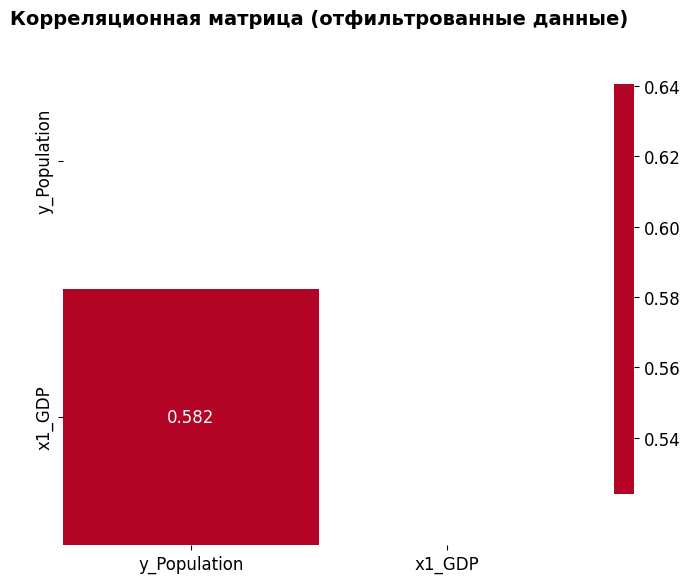

In [8]:
# Вычисление корреляционной матрицы для отфильтрованных данных
filtered_correlation_matrix = df_filtered.corr()

print("Новая корреляционная матрица (отфильтрованные данные):")
print(filtered_correlation_matrix.round(3))

# Визуализация новой корреляционной матрицы
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(filtered_correlation_matrix, dtype=bool))
sns.heatmap(filtered_correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            mask=mask,
            cbar_kws={"shrink": .8},
            fmt='.3f')
plt.title('Корреляционная матрица (отфильтрованные данные)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [9]:
# Анализ корреляций с y для отфильтрованных данных
filtered_y_correlations = filtered_correlation_matrix['y_Population'].drop('y_Population')

print("Корреляции с численностью населения (отфильтрованные данные):")
print("="*60)
for var, corr in filtered_y_correlations.items():
    print(f"{var:<20}: {corr:>7.3f}")

# Анализ корреляций между оставшимися факторами
if len(relevant_factors) > 1:
    print("\nКорреляции между оставшимися факторами:")
    print("="*45)
    filtered_x_correlations = filtered_correlation_matrix.loc[relevant_factors, relevant_factors]
    
    for i, var1 in enumerate(relevant_factors):
        for j, var2 in enumerate(relevant_factors):
            if i < j:
                corr = filtered_x_correlations.loc[var1, var2]
                print(f"{var1} - {var2}: {corr:.3f}")
else:
    print("\nОстался только один фактор - анализ корреляций между факторами невозможен.")


Корреляции с численностью населения (отфильтрованные данные):
x1_GDP              :   0.582

Остался только один фактор - анализ корреляций между факторами невозможен.


## 3. Выводы и интерпретация результатов корреляционного анализа

### 3.1 Основные результаты

**Размер выборки:** 57 стран/регионов (требование n≥40 выполнено)

**Модель:** y (численность населения) ~ x1 (ВВП) + x2 (CO₂) + x3 (энергопотребление) + x4 (здравоохранение) + x5 (урбанизация)

### 3.2 Корреляционный анализ полных данных

**Корреляции с зависимой переменной (численность населения):**
- **x1_GDP: +0.582** - умеренная положительная связь (ЗНАЧИМАЯ)
- **x2_CO2: -0.041** - очень слабая отрицательная связь
- **x3_Energy: -0.122** - очень слабая отрицательная связь  
- **x4_Healthcare: -0.195** - очень слабая отрицательная связь
- **x5_Urbanization: -0.339** - слабая отрицательная связь

**Мультиколлинеарность между факторами:**
- x1_GDP × x2_CO2: 0.368 (умеренная)
- x1_GDP × x4_Healthcare: 0.364 (умеренная)
- x4_Healthcare × x5_Urbanization: 0.425 (умеренная)

### 3.3 Результаты фильтрации по критерию |r| ≥ 0.4

**Отобранные факторы:** x1_GDP (r = 0.582)
**Исключенные факторы:** x2_CO2, x3_Energy, x4_Healthcare, x5_Urbanization

**Финальная модель:** y ~ x1_GDP

### 3.4 Экономическая интерпретация

1. **ВВП как главный фактор:** Единственный значимый фактор, объясняющий вариацию численности населения. Это логично, поскольку:
   - Более богатые страны привлекают мигрантов
   - Экономическое развитие связано с улучшением условий жизни
   - Большие страны обычно имеют более развитую экономику

2. **Слабое влияние экологических факторов:** CO₂ и энергопотребление показали очень слабую корреляцию, что может означать:
   - Экологические проблемы не являются определяющими для размера населения
   - Возможны нелинейные зависимости, не улавливаемые корреляцией Пирсона

3. **Неожиданно слабая роль социальных факторов:** Здравоохранение и урбанизация показали отрицательную корреляцию, что может объясняться:
   - Демографическим переходом в развитых странах
   - Снижением рождаемости при улучшении условий жизни

### 3.5 Ограничения исследования

1. **Корреляция ≠ Причинность:** Высокая корреляция не означает причинно-следственную связь
2. **Линейная модель:** Анализ учитывает только линейные зависимости
3. **Пространственные данные:** Используются данные на определенный момент времени
4. **Мультиколлинеарность:** Некоторые факторы взаимосвязаны, что может искажать результаты

